# Link to Dataset

Ireland

https://data.gov.ie/dataset/toa11-luas-passenger-numbers

Turkey

https://data.ibb.gov.tr/en/dataset/yas-grubuna-gore-rayli-sistemler-istasyon-bazli-yolcu-ve-yolculuk-sayilari/resource/8bed95de-bbe2-4550-80f2-87ca51a97f3d

API

https://data.ibb.gov.tr/tr/datastore/odata3.0/5c2b78fc-3b68-4722-844f-3051c358a13f

CSV

https://data.ibb.gov.tr/en/dataset/d3df8db4-1ac6-4bfe-8896-7ec1159caa2b/resource/8bed95de-bbe2-4550-80f2-87ca51a97f3d/download/2022-yl-ya-grubuna-gore-rayl-sistemler-istasyon-bazl-yolcu-ve-yolculuk-saylar.csv

https://data.ibb.gov.tr/tr/datastore/odata3.0/5c2b78fc-3b68-4722-844f-3051c358a13f?top=5&format=json

In [1]:
# Import NumPy, Pandas, Matplotlib, Seaborn libraries and Plotly Express, and Sci

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Import warnings and applyt filterwarnings to ignore them.

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Luas_Passenger_Number.csv")

# pd.read_csv function in order to read the csv file containing the population estimated construction status report

In [4]:
df1=pd.read_csv("Turkey_Rail_Passenger_Number.csv", encoding = 'latin-1')

df1 = pd.read_csv("Turkey_Rail_Passenger_Number.csv")

A problem was encountered when trying to open the file. To fix the problem, it was observed that there was a problem decoding a byte in the file using the 'utf-8' encoding, so an addition to the code was made accordingly.

In [5]:
df.head(5)

,STATISTIC,Statistic Label,TLIST(A1),Year,C01885V02316,Month,UNIT,VALUE
0,TOA11C01,Red line,2018,2018,1,January,Number,1664495
1,TOA11C01,Red line,2018,2018,2,February,Number,1657562
2,TOA11C01,Red line,2018,2018,3,March,Number,1661098
3,TOA11C01,Red line,2018,2018,4,April,Number,1794424
4,TOA11C01,Red line,2018,2018,5,May,Number,1934553


In [6]:
missing_values = ['/',' ','-','--','na','Na','n/a','NA','n.a.','?','nan','Nan','nul','Nul','null','Null']

df= pd.read_csv('Luas_Passenger_Number.csv',na_values=missing_values)

# Create a list with all the possible missing value formats. Create a name for the dataframe as report
# ('PopulationEstimatesDatabase1')and apply the pd.read_csv function 
# Include the variable 'na_values' and define it with the 'missing values' list previously created

In [7]:
df.isnull().sum()

# Check missing values by applying the .isnull().sum method to the dataframe

STATISTIC           0
Statistic Label     0
TLIST(A1)           0
Year                0
C01885V02316       15
Month               0
UNIT                0
VALUE               0
dtype: int64

In [8]:
df.isnull().sum() / len(df) * 100

STATISTIC          0.000000
Statistic Label    0.000000
TLIST(A1)          0.000000
Year               0.000000
C01885V02316       7.692308
Month              0.000000
UNIT               0.000000
VALUE              0.000000
dtype: float64

In [9]:
df.columns

Index(['STATISTIC', 'Statistic Label', 'TLIST(A1)', 'Year', 'C01885V02316',
       'Month', 'UNIT', 'VALUE'],
      dtype='object')

In [10]:
df.rename(columns={'Statistic Label':'Luas_Type', 
                   'UNIT':'Unit', 'VALUE':'Value_Ireland'}, inplace=True)

In [11]:
df.head(2)

,STATISTIC,Luas_Type,TLIST(A1),Year,C01885V02316,Month,Unit,Value_Ireland
0,TOA11C01,Red line,2018,2018,1.0,January,Number,1664495
1,TOA11C01,Red line,2018,2018,2.0,February,Number,1657562


In [12]:
df.drop(columns=["STATISTIC", "TLIST(A1)", "C01885V02316","Unit"], inplace=True)

In [13]:
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

df['Month'] = df['Month'].map(month_mapping)

df['Month'] = pd.to_numeric(df['Month'], errors='coerce')

df['Month'].fillna(0, inplace=True)

df['Month'] = df['Month'].astype(int)

print(df)

          Luas_Type  Year  Month  Value_Ireland
0          Red line  2018      1        1664495
1          Red line  2018      2        1657562
2          Red line  2018      3        1661098
3          Red line  2018      4        1794424
4          Red line  2018      5        1934553
..              ...   ...    ...            ...
190  All Luas lines  2022      9        3811093
191  All Luas lines  2022     10        4219124
192  All Luas lines  2022     11        4375705
193  All Luas lines  2022     12        4030698
194  All Luas lines  2022      0       38667875

[195 rows x 4 columns]


In [14]:
dft = df[df['Luas_Type'] != 'All Luas lines']

print(dft)

      Luas_Type  Year  Month  Value_Ireland
0      Red line  2018      1        1664495
1      Red line  2018      2        1657562
2      Red line  2018      3        1661098
3      Red line  2018      4        1794424
4      Red line  2018      5        1934553
..          ...   ...    ...            ...
125  Green line  2022      9        1830015
126  Green line  2022     10        2063739
127  Green line  2022     11        2097731
128  Green line  2022     12        1972696
129  Green line  2022      0       18392801

[130 rows x 4 columns]


In [84]:
dft.head(5)

,Year,Month,Value_Ireland,Luas_Type_Encoded
0,2018,1,1664495,1
1,2018,2,1657562,1
2,2018,3,1661098,1
3,2018,4,1794424,1
4,2018,5,1934553,1


# dft = all luas line all year dataframe

In [16]:
dframe = pd.DataFrame(df)

df = dframe[(dframe['Luas_Type'] == 'All Luas lines')]

print(df)

          Luas_Type  Year  Month  Value_Ireland
130  All Luas lines  2018      1        3218649
131  All Luas lines  2018      2        3118289
132  All Luas lines  2018      3        3097570
133  All Luas lines  2018      4        3350056
134  All Luas lines  2018      5        3622338
..              ...   ...    ...            ...
190  All Luas lines  2022      9        3811093
191  All Luas lines  2022     10        4219124
192  All Luas lines  2022     11        4375705
193  All Luas lines  2022     12        4030698
194  All Luas lines  2022      0       38667875

[65 rows x 4 columns]


# df= all luas line all year dataframe

In [17]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [18]:
l_encoder = LabelEncoder()

# Put the type of all data of object type into the same shape (float).with the Encoder function.

In [19]:
df["Luas_Type_Encoded"] =l_encoder.fit_transform(df["Luas_Type"])

#To convert the numeric value of the 'Luas_Type' column .l_encoder.fit_transform function

In [20]:
dft["Luas_Type_Encoded"] =l_encoder.fit_transform(dft["Luas_Type"])

#To convert the numeric value of the 'Luas_Type' column .l_encoder.fit_transform function

In [21]:
df.drop(columns=["Luas_Type"], inplace=True)

In [22]:
dft.drop(columns=["Luas_Type"], inplace=True)

In [23]:
df.head(2)

,Year,Month,Value_Ireland,Luas_Type_Encoded
130,2018,1,3218649,0
131,2018,2,3118289,0


In [24]:
df.shape

(65, 4)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 130 to 194
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Year               65 non-null     int64
 1   Month              65 non-null     int32
 2   Value_Ireland      65 non-null     int64
 3   Luas_Type_Encoded  65 non-null     int32
dtypes: int32(2), int64(2)
memory usage: 2.0 KB


In [26]:
dft.head(2)

,Year,Month,Value_Ireland,Luas_Type_Encoded
0,2018,1,1664495,1
1,2018,2,1657562,1


In [27]:
dft.shape

(130, 4)

All Luas line = 0

Green line = 1

Red line=2

In [28]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 129
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Year               130 non-null    int64
 1   Month              130 non-null    int32
 2   Value_Ireland      130 non-null    int64
 3   Luas_Type_Encoded  130 non-null    int32
dtypes: int32(2), int64(2)
memory usage: 4.1 KB


In [29]:
df_2022 = df[df['Year'] == 2022]

print(df_2022)

     Year  Month  Value_Ireland  Luas_Type_Encoded
182  2022      1        1810277                  0
183  2022      2        2232074                  0
184  2022      3        2677589                  0
185  2022      4        2719243                  0
186  2022      5        3052020                  0
187  2022      6        3185330                  0
188  2022      7        3262491                  0
189  2022      8        3292231                  0
190  2022      9        3811093                  0
191  2022     10        4219124                  0
192  2022     11        4375705                  0
193  2022     12        4030698                  0
194  2022      0       38667875                  0


In [30]:
df2 = df_2022[df_2022['Month'] != 0]
print(df2)

     Year  Month  Value_Ireland  Luas_Type_Encoded
182  2022      1        1810277                  0
183  2022      2        2232074                  0
184  2022      3        2677589                  0
185  2022      4        2719243                  0
186  2022      5        3052020                  0
187  2022      6        3185330                  0
188  2022      7        3262491                  0
189  2022      8        3292231                  0
190  2022      9        3811093                  0
191  2022     10        4219124                  0
192  2022     11        4375705                  0
193  2022     12        4030698                  0


# df2 = All luas line, year 2022

In [31]:
missing_values = ['/',' ','-','--','na','Na','n/a','NA','n.a.','?','nan','Nan','nul','Nul','null','Null']

df1=pd.read_csv("Turkey_Rail_Passenger_Number.csv", encoding = 'latin-1' ,na_values=missing_values )


In [32]:
df1.isnull().sum()

passage_cnt              0
passanger_cnt            0
transaction_year         0
transaction_month        0
transaction_day          0
line                     0
station_name          3657
station_number        3657
town                 51100
age                      0
longitude            85345
latitude             85345
dtype: int64

In [33]:
df1.columns

Index(['passage_cnt', 'passanger_cnt', 'transaction_year', 'transaction_month',
       'transaction_day', 'line', 'station_name', 'station_number', 'town',
       'age', 'longitude', 'latitude'],
      dtype='object')

In [34]:
df1.drop(columns=["station_name", "passage_cnt", "station_number", "town", "longitude", "latitude", "line"], inplace=True)

In [35]:
df1.rename(columns={ 'transaction_year':'Year', 'transaction_month':'Month',
                    'transaction_day':'Day_Turkey', 'passanger_cnt':'Value_Turkey', 'age': 'Age'}, inplace=True)

In [36]:
df1.isnull().sum() / len(df) * 100

Value_Turkey    0.0
Year            0.0
Month           0.0
Day_Turkey      0.0
Age             0.0
dtype: float64

In [37]:
df1["Age_Encoded"] =l_encoder.fit_transform(df1["Age"])

In [38]:
df1.drop(columns=["Age"], inplace=True)

In [39]:
df1.head(5)

,Value_Turkey,Year,Month,Day_Turkey,Age_Encoded
0,1656,2022,1,1,0
1,2469,2022,1,1,0
2,2119,2022,1,1,1
3,3085,2022,1,1,1
4,1006,2022,1,1,2


In [40]:
df1['month_day'] = df1['Month'].astype(str).str.zfill(2) + '_' + df1['Day_Turkey'].astype(str).str.zfill(2)

df1_2022 = df1.groupby(['Year', 'Month'])['Value_Turkey'].sum().reset_index()

print(df1_2022)

    Year  Month  Value_Turkey
0   2022      1      61040332
1   2022      2      63443256
2   2022      3      74738772
3   2022      4      71808241
4   2022      5      77604746
5   2022      6      75487693
6   2022      7      62299224
7   2022      8      67385807
8   2022      9      74674312
9   2022     10      89331529
10  2022     11      85124266
11  2022     12      87866824


In [41]:
df1_2022.shape

(12, 3)

In [42]:
df2.shape

(12, 4)

# df1_2022 Turkey all rail, year 2022

In [43]:
merged_df = pd.merge(df2, df1_2022, on='Month', how='outer')

print(merged_df)

    Year_x  Month  Value_Ireland  Luas_Type_Encoded  Year_y  Value_Turkey
0     2022      1        1810277                  0    2022      61040332
1     2022      2        2232074                  0    2022      63443256
2     2022      3        2677589                  0    2022      74738772
3     2022      4        2719243                  0    2022      71808241
4     2022      5        3052020                  0    2022      77604746
5     2022      6        3185330                  0    2022      75487693
6     2022      7        3262491                  0    2022      62299224
7     2022      8        3292231                  0    2022      67385807
8     2022      9        3811093                  0    2022      74674312
9     2022     10        4219124                  0    2022      89331529
10    2022     11        4375705                  0    2022      85124266
11    2022     12        4030698                  0    2022      87866824


In [44]:
merged_df.shape

(12, 6)

# merged_df = Ireland and Turkey 2022

In [45]:
df.shape

(65, 4)

In [46]:
df.head(5)

,Year,Month,Value_Ireland,Luas_Type_Encoded
130,2018,1,3218649,0
131,2018,2,3118289,0
132,2018,3,3097570,0
133,2018,4,3350056,0
134,2018,5,3622338,0


In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,65.0,2.020000e+03,1.425219e+00,2018.0,2019.0,2020.0,2021.0,2022.0
Month,65.0,6.000000e+00,3.770776e+00,0.0,3.0,6.0,9.0,12.0
Value_Ireland,65.0,5.154137e+06,8.979080e+06,228633.0,1821536.0,3292231.0,3919977.0,48347231.0
Luas_Type_Encoded,65.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0


In [48]:
years = dft.loc[dft['Year'] != 0]

In [49]:
dft.head(5)

,Year,Month,Value_Ireland,Luas_Type_Encoded
0,2018,1,1664495,1
1,2018,2,1657562,1
2,2018,3,1661098,1
3,2018,4,1794424,1
4,2018,5,1934553,1


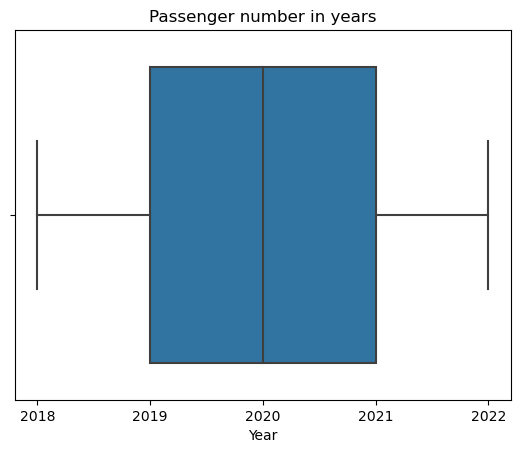

In [50]:
import matplotlib.ticker as ticker

# Apply sns.boxplot to visualise the distribution of completed projects along different years.
# Use the 'years' dataframe as the data source and specify 'Completed_Year' as the column to group the data by.

sns.boxplot(data=years, x='Year')

# Set the title of the box plot using the plt.title() function

plt.title('Passenger number in years')

# Convert the years in the y-axis to integers for better visualization

# Apply the .gca() method to get the current axes and apply the xaxis attribute set the x-axis tick locator to display
# integers only

plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Call the plt.show() function to display the box plot

plt.show()

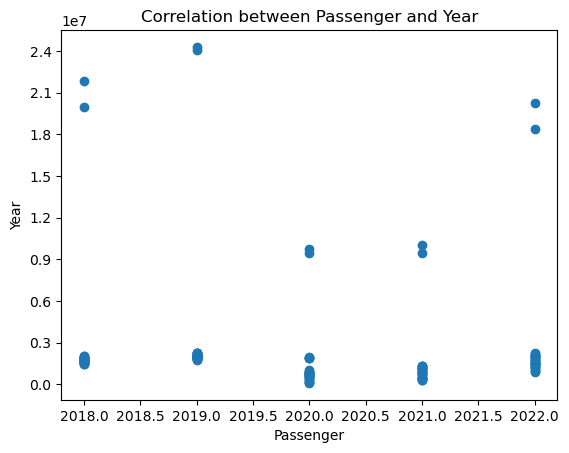

In [57]:
# Plot a scatter plot to visualize the relationship between Value_Ireland and years

plt.scatter(dft["Year"], dft["Value_Ireland"])

# Name the x axis, the y axis and the plot by applying the the plt.xlabel() function, the plt.ylabel() function, and the
# plt.title() function respectively

plt.xlabel("Passenger")
plt.ylabel("Year")
plt.title('Correlation between Passenger and Year')

# Apply plt.gca() to get the current axes instance

# Use the .yaxis attribute to access the y-axis of the current axes

# Use the .set_major_locator() method to set the tick locator for the major ticks on the y-axis

# Pass plt.MaxNLocator(integer=True) to the .set_major_locator() method to ensure that the tick locations are integers

plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Call plt.show() to display the plot

plt.show()

,Year,Month,Value_Ireland,Luas_Type_Encoded
Year,1.000000e+00,2.435632e-14,-0.085967,NaN
Month,2.435632e-14,1.000000e+00,-0.399365,NaN
Value_Ireland,-8.596660e-02,-3.993647e-01,1.000000,NaN
Luas_Type_Encoded,NaN,NaN,NaN,NaN


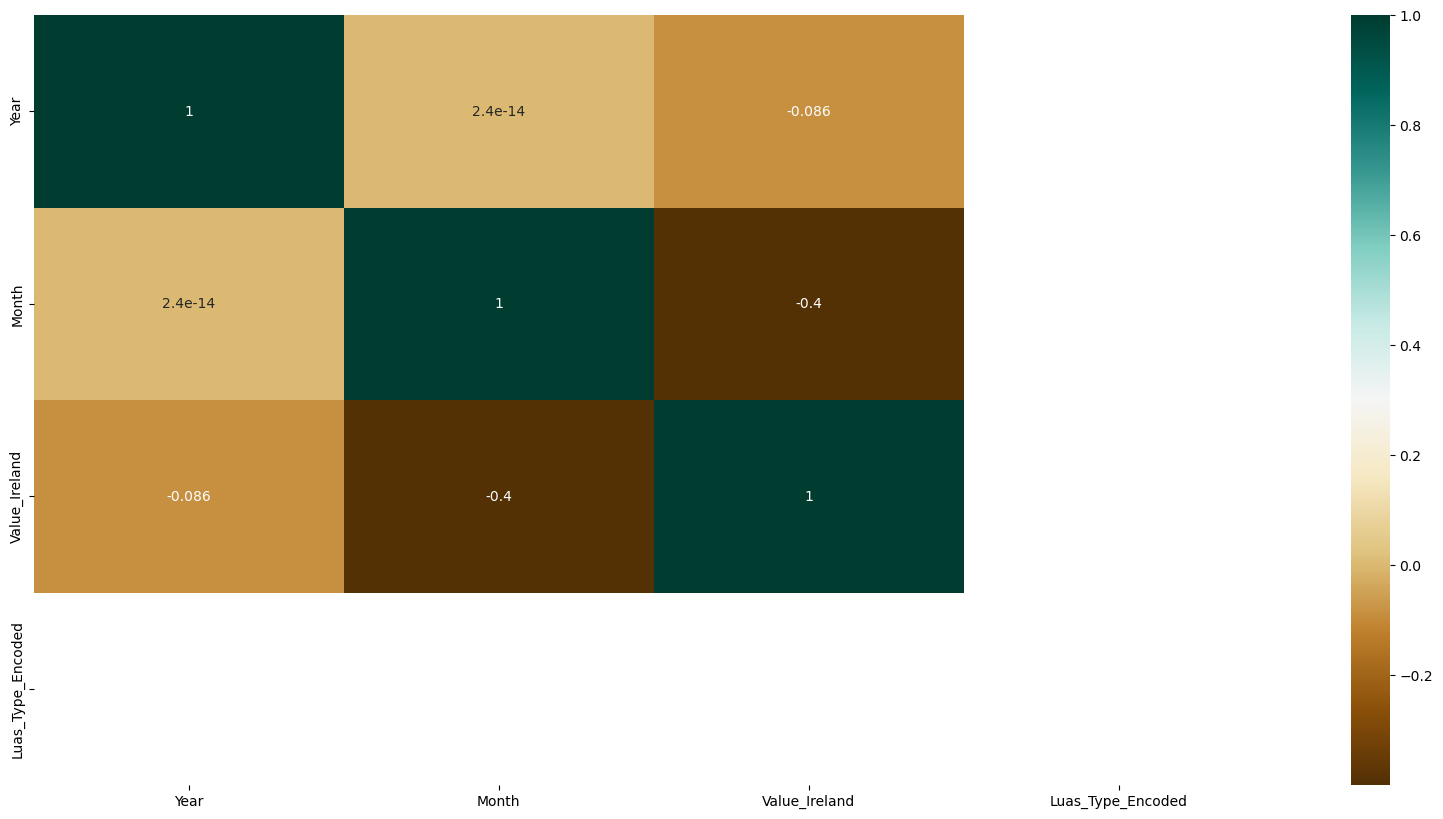

In [58]:
# Call the plt.figure() functionto determine the dimensions of the correlation heatmap

plt.figure(figsize=(20,10))

# Define the variable 'c' which is going to be a table containng the correlation coefficients

c= df.corr()

# Apply sns.heatmap() to plot the heatmap and include 'c', define the colormap as brown, blue, and green,
# and apply annot=True so that the correlation coefficients are visible within the heatmap

sns.heatmap(c,cmap="BrBG",annot=True)

# Print 'c' to show a table with the correlation coefficients

c

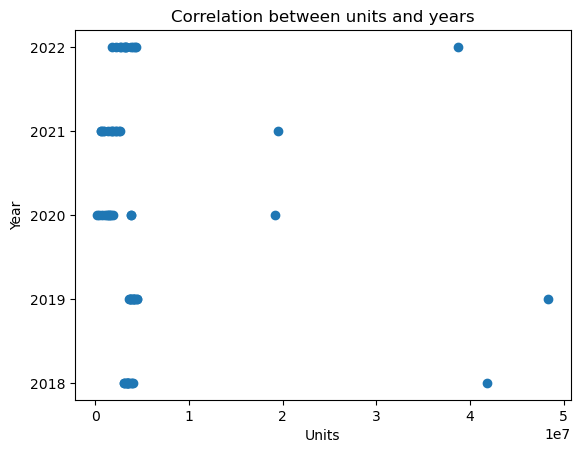

In [59]:
# Plot a scatter plot to visualize the relationship between units and years

# Call the plt.scatter() function to create a scatter plot with the 'Units' as x-axis values and 'Completed_Year' as y-axis
#values

plt.scatter(df["Value_Ireland"], df["Year"])

# Name the x axis, the y axis and the plot by applying the the plt.xlabel() function, the plt.ylabel() function, and the
# plt.title() function respectively

plt.xlabel("Units")
plt.ylabel("Year")
plt.title('Correlation between Passenger and Years')

# Apply plt.gca() to get the current axes instance

# Use the .yaxis attribute to access the y-axis of the current axes

# Use the .set_major_locator() method to set the tick locator for the major ticks on the y-axis

# Pass plt.MaxNLocator(integer=True) to the .set_major_locator() method to ensure that the tick locations are integers

plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Call plt.show() to display the plot

plt.show()

In [62]:
from scipy import stats

# Calculate the confidence intervals

# Extract the data for the 'Units' variable

Values = df['Value_Ireland']

# Calculate the sample mean and standard deviation
sample_mean = np.mean(Values)
sample_std = np.std(Values, ddof=1) # use ddof=1 to get the sample standard deviation
n = len(Values)

# Set the desired confidence level
confidence_level = 0.95
alpha = 1 - confidence_level

# Calculate the margin of error
margin_of_error = stats.t.ppf(1 - alpha/2, n-1) * sample_std / np.sqrt(n)

# Calculate the confidence interval
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"{confidence_level*100:.1f}% confidence interval for the average number of Passenger number by year': [{ci_lower:.2f}, {ci_upper:.2f}]")

95.0% confidence interval for the average number of Passenger number by year': [2929229.83, 7379043.96]


In [63]:
df.head(5)

,Year,Month,Value_Ireland,Luas_Type_Encoded
130,2018,1,3218649,0
131,2018,2,3118289,0
132,2018,3,3097570,0
133,2018,4,3350056,0
134,2018,5,3622338,0


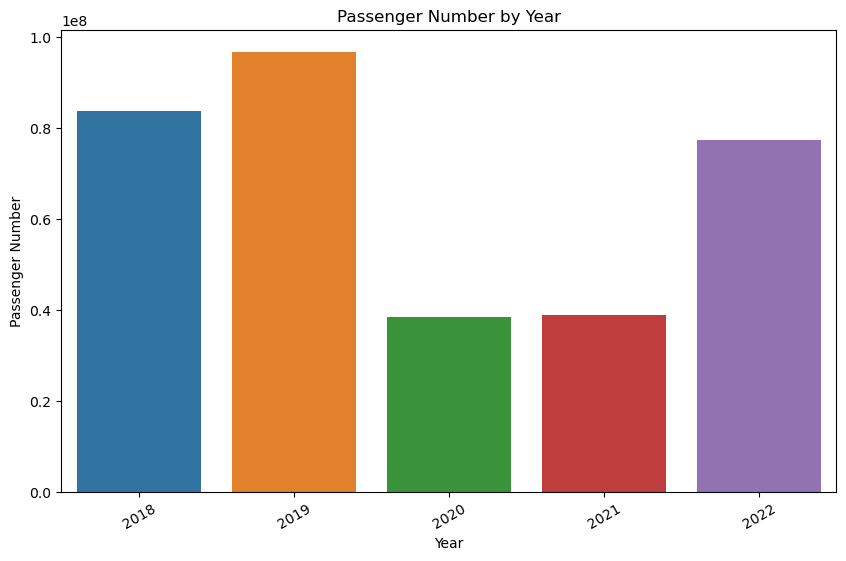

In [68]:
Value_Year = df.groupby('Year')['Value_Ireland'].sum().reset_index()

# Sort the county_units dataframe by the total number of units in descending order
Value_Year = Value_Year.sort_values('Value_Ireland', ascending=False)

# Set the figure size to (10, 6) inches

plt.figure(figsize=(10, 6))

# Create a countplot to visualize the total projects per county

sns.barplot(data=Value_Year, x='Year', y='Value_Ireland')

# Set the title,the x label, and the y label of the plot by applying the the plt.title() function, the plt.xlabel() function,
# abd the plt.ylabel() function respectively

plt.title('Passenger Number by Year')
plt.xlabel('Year')
plt.ylabel('Passenger Number')

# Rotate the x-axis labels for better readability using the xticks() function

plt.xticks(rotation=30)

# Display the plot using the show() function

plt.show()

In [81]:
dft.head(5)

,Year,Month,Value_Ireland,Luas_Type_Encoded
0,2018,1,1664495,1
1,2018,2,1657562,1
2,2018,3,1661098,1
3,2018,4,1794424,1
4,2018,5,1934553,1


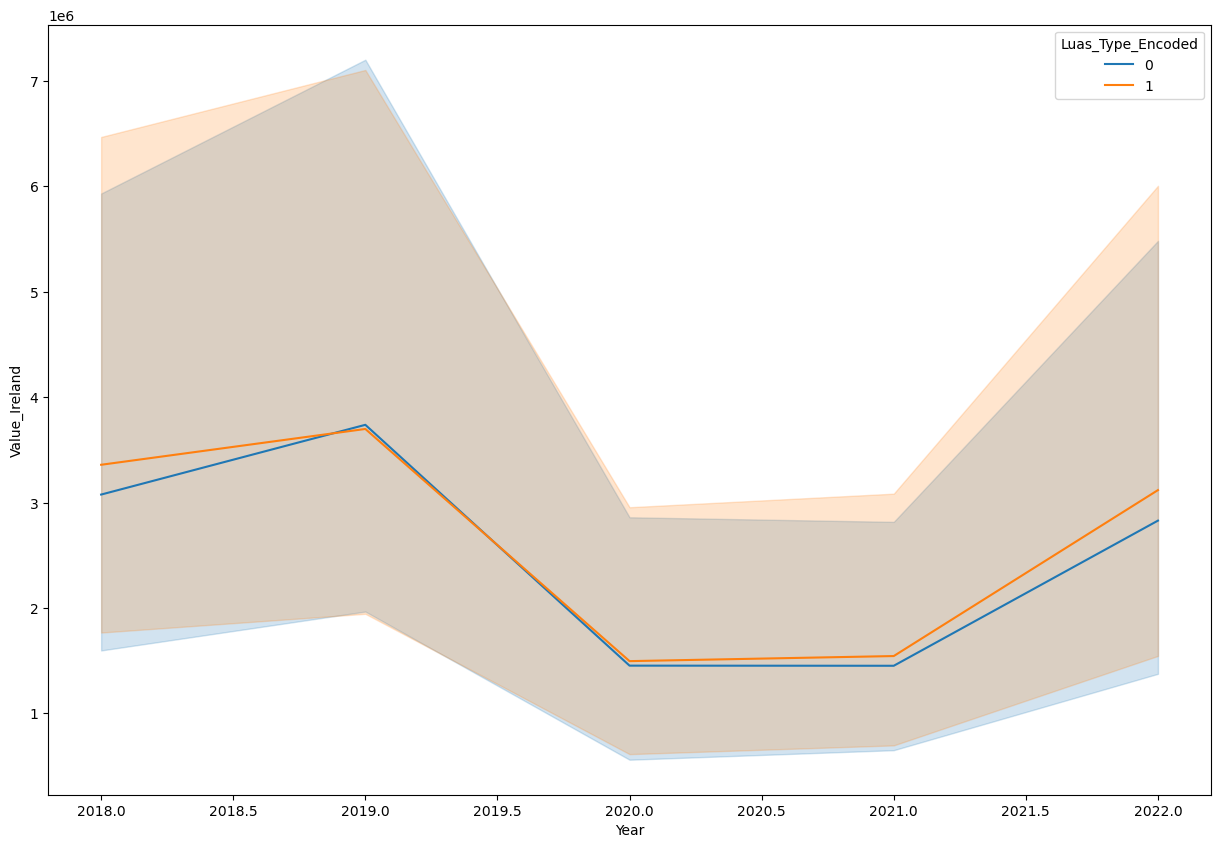

In [90]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=dft, x='Year', y='Value_Ireland', hue='Luas_Type_Encoded')
plt.show()

In [87]:
dft.groupby('Year')['Value_Ireland'].mean().sort_values(ascending=False)

Year
2019    3.719018e+06
2018    3.218228e+06
2022    2.974452e+06
2021    1.498563e+06
2020    1.475081e+06
Name: Value_Ireland, dtype: float64

# STATISTICS

In [93]:
# Check normality to determine which tests to use

# Import stats from the scipy library

from scipy import stats

# Extract data from the 'Obs_Value'

data = df2['Value_Ireland']

# Perform the Shapiro-Wilk test

statistic, p_value = stats.shapiro(data)

# Print the results

print(f'Statistic: {statistic:.4f}, p-value: {p_value:.4f}')

# Interpret the results

alpha = 0.05
if p_value > alpha:
    print('The data is normally distributed')
else:
    print('The data is not normally distributed')

Statistic: 0.9672, p-value: 0.8796
The data is normally distributed


A Kruskal-Wallis H-test will be applied to measure the difference in price index between two chosen countries: Turkey and Ireland, given that they have been the countries with higher passenger number. This test has been chosen because the data is not normally distributed.

H0(null hypothesis): there is no significant difference between the average price in Turkey and Ireland

H1(alternative hypothesis): there is a significant difference between the average price in Turkey and Ireland

In [ ]:
# Select data for Turkey

# extract the house price index data for each country
tukey = df1_2022[df1_2022['Value_Turkey'] == 'ES']['Value_Turkey']

# Select data for Ireland

ireland = prices_eu[prices_eu['Geo'] == 'IE']['Obs_Value']

# perform the Kruskal-Wallis H-test
statistic, p_value = stats.kruskal(spain, ireland)

# print the results
print(f'Statistic: {statistic:.4f}, p-value: {p_value:.4f}')